In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [3]:
df = pd.read_csv('biweekly_hra.csv')
df

,HRA,Week_Start,Week_End,Positives,Positive_Rate,Confirmed_Cases,Confirmed_Case_Rate,Probable_Cases,Probable_Case_Rate,People_Tested,People_Tested_Rate,All_Test_Results,All_Test_Results_Rate,Hospitalizations,Hospitalization_Rate,Deaths,Death_Rate
0,Auburn-North,2020-03-02,2020-03-16,8,17.83,8,17.83,0,0.00,130,289.73,135,300.87,5,11.14,0,0.00
1,Auburn-North,2020-03-17,2020-03-31,70,156.01,70,156.01,0,0.00,438,976.15,447,996.21,13,28.97,1,2.23
2,Auburn-North,2020-04-01,2020-04-15,72,160.46,72,160.46,0,0.00,403,898.15,412,918.21,17,37.89,1,2.23
3,Auburn-North,2020-04-16,2020-04-30,55,122.58,55,122.58,0,0.00,513,1143.30,535,1192.33,10,22.29,6,13.37
4,Auburn-North,2020-05-01,2020-05-15,44,98.06,44,98.06,0,0.00,463,1031.87,482,1074.21,7,15.60,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,West Seattle,2022-06-20,2022-07-04,490,784.51,460,736.48,30,48.03,2190,3506.30,2321,3716.03,9,14.41,3,4.80
2985,West Seattle,2022-07-05,2022-07-19,483,773.31,470,752.49,13,20.81,2156,3451.86,2255,3610.36,7,11.21,3,4.80
2986,West Seattle,2022-07-20,2022-08-03,325,520.34,307,491.52,18,28.82,1745,2793.83,1827,2925.12,6,9.61,2,3.20
2987,West Seattle,2022-08-04,2022-08-18,238,381.05,230,368.24,8,12.81,1372,2196.64,1425,2281.49,4,6.40,5,8.01


In [5]:
df['Week_Start'] = pd.to_datetime(df['Week_Start'])
#converting Week_Start to Datetime format

In [6]:
df.groupby(df['Week_Start'].dt.strftime('%B'))['Hospitalizations'].sum().sort_values()
#Converting Week_Start from Datetime to String for grouping
#%B - The full month name according to the current locale

Week_Start
February      546
September     631
October       749
June          895
May          1034
July         1122
November     1170
March        1178
August       1357
December     1455
April        1466
January      1861
Name: Hospitalizations, dtype: int64

In [7]:
df_graph=df.groupby(df['Week_Start'].dt.strftime('%Y'))['Hospitalizations'].sum().sort_values()
#%Y - The year as a decimal number including the century
print(df_graph)

Week_Start
2022    4063
2020    4463
2021    4938
Name: Hospitalizations, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

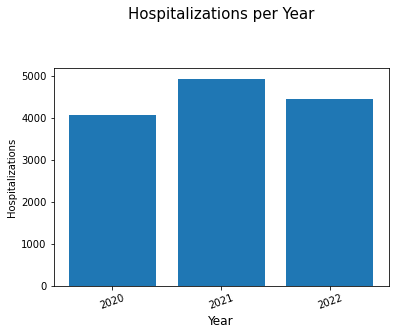

In [11]:
fig, ax = plt.subplots()

y = np.array([4063, 4938, 4463])
x = np.array([2020, 2021, 2022])
labels = ['2020', '2021', '2022']
#plt.tick_params(rotation=45)
ax.bar(x, y, label="Hospitalizations")
plt.xticks(x, labels, rotation=20)
plt.title("Hospitalizations per Year", fontsize="15", x=0.5, y=1.2)
plt.xlabel("Year", fontsize = "12")
plt.ylabel("Hospitalizations")
#ax.bar_label(y, padding=3)
plt.show

In [12]:
#df.isnull()
df.isnull().sum()
#the 61 columns that contain data for Unknown HRAs have no population data to reference, creating nulls when calculating Rates

HRA                       0
Week_Start                0
Week_End                  0
Positives                 0
Positive_Rate            61
Confirmed_Cases           0
Confirmed_Case_Rate      61
Probable_Cases            0
Probable_Case_Rate       61
People_Tested             0
People_Tested_Rate       61
All_Test_Results          0
All_Test_Results_Rate    61
Hospitalizations          0
Hospitalization_Rate     61
Deaths                    0
Death_Rate               61
dtype: int64

In [13]:
dfpop = pd.read_csv("COVID19_HRA.csv")
dfpop

,geo_id,pop,case_count,hosp_count,death_count,total_hosp_incidental,pcr_test_count,pcr_test_pos_count,pcr_test_pos_percent
0,Auburn-North,44869.984,14229,628,131,183,103436,13285,12.843691
1,Auburn-South,28373.314,9460,479,115,126,69714,8954,12.843905
2,Ballard,63248.329,11664,158,33,77,226889,11090,4.887853
3,Beacon/Gtown/S.Park,43457.181,10944,324,55,105,154077,10436,6.773237
4,Bear Creek/Carnation/Duvall,71721.871,10316,222,40,92,127679,9054,7.091221
5,Bellevue-Central,40312.567,8765,226,48,60,127378,8297,6.513684
6,Bellevue-NE,38775.334,7375,150,43,47,84579,6891,8.147412
7,Bellevue-South,34636.532,6269,88,20,33,87289,5907,6.767176
8,Bellevue-West,36790.143,7043,132,35,42,98176,6387,6.505663
9,Black Diamond/Enumclaw/SE County,50414.504,11253,398,97,107,103370,10408,10.068685


In [14]:
dfpop = dfpop.rename(columns={'geo_id':'HRA'})
dfpop['pop'] = dfpop['pop'].fillna(0)
dfpop.sort_values(by=['pop'], ascending=False)
#dfpop.sort_values(by=['hosp_count'], ascending=False)

,HRA,pop,case_count,hosp_count,death_count,total_hosp_incidental,pcr_test_count,pcr_test_pos_count,pcr_test_pos_percent
17,Downtown,78898.798,14855,480,102,263,287985,13809,4.795041
30,NE Seattle,77617.253,15506,122,31,68,347864,15034,4.321804
36,QA/Magnolia,73652.347,13642,180,50,94,259295,12919,4.982356
4,Bear Creek/Carnation/Duvall,71721.871,10316,222,40,92,127679,9054,7.091221
37,Redmond,68774.948,10974,229,77,95,149234,10246,6.865728
21,Fremont/Greenlake,65645.508,13184,105,25,64,256153,12678,4.949386
20,Fed Way-Central/Military Rd,63665.023,18968,801,179,253,138008,17035,12.343487
2,Ballard,63248.329,11664,158,33,77,226889,11090,4.887853
47,West Seattle,62459.060,12956,195,74,96,203876,12263,6.014931
14,Covington/Maple Valley,62232.449,15400,396,57,124,125602,14280,11.369246


In [15]:
pd.merge(df, dfpop, on='HRA')

,HRA,Week_Start,Week_End,Positives,Positive_Rate,Confirmed_Cases,Confirmed_Case_Rate,Probable_Cases,Probable_Case_Rate,People_Tested,...,Deaths,Death_Rate,pop,case_count,hosp_count,death_count,total_hosp_incidental,pcr_test_count,pcr_test_pos_count,pcr_test_pos_percent
0,Auburn-North,2020-03-02,2020-03-16,8,17.83,8,17.83,0,0.00,130,...,0,0.00,44869.984,14229,628,131,183,103436,13285,12.843691
1,Auburn-North,2020-03-17,2020-03-31,70,156.01,70,156.01,0,0.00,438,...,1,2.23,44869.984,14229,628,131,183,103436,13285,12.843691
2,Auburn-North,2020-04-01,2020-04-15,72,160.46,72,160.46,0,0.00,403,...,1,2.23,44869.984,14229,628,131,183,103436,13285,12.843691
3,Auburn-North,2020-04-16,2020-04-30,55,122.58,55,122.58,0,0.00,513,...,6,13.37,44869.984,14229,628,131,183,103436,13285,12.843691
4,Auburn-North,2020-05-01,2020-05-15,44,98.06,44,98.06,0,0.00,463,...,0,0.00,44869.984,14229,628,131,183,103436,13285,12.843691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,West Seattle,2022-06-20,2022-07-04,490,784.51,460,736.48,30,48.03,2190,...,3,4.80,62459.060,12956,195,74,96,203876,12263,6.014931
2863,West Seattle,2022-07-05,2022-07-19,483,773.31,470,752.49,13,20.81,2156,...,3,4.80,62459.060,12956,195,74,96,203876,12263,6.014931
2864,West Seattle,2022-07-20,2022-08-03,325,520.34,307,491.52,18,28.82,1745,...,2,3.20,62459.060,12956,195,74,96,203876,12263,6.014931
2865,West Seattle,2022-08-04,2022-08-18,238,381.05,230,368.24,8,12.81,1372,...,5,8.01,62459.060,12956,195,74,96,203876,12263,6.014931


In [16]:
df.dtypes

HRA                              object
Week_Start               datetime64[ns]
Week_End                         object
Positives                         int64
Positive_Rate                   float64
Confirmed_Cases                   int64
Confirmed_Case_Rate             float64
Probable_Cases                    int64
Probable_Case_Rate              float64
People_Tested                     int64
People_Tested_Rate              float64
All_Test_Results                  int64
All_Test_Results_Rate           float64
Hospitalizations                  int64
Hospitalization_Rate            float64
Deaths                            int64
Death_Rate                      float64
dtype: object

In [17]:
#Selecting dataframe columns
df2 = df[['HRA', 'Week_Start', 'Hospitalizations']]
df2
#Selecting by Month?
df2['year'] = pd.DatetimeIndex(df2['Week_Start']).year
df2['month'] = pd.DatetimeIndex(df2['Week_Start']).month_name()
#df2.head()
#df2.describe()
df.info()
#nulls are from cases in an unknown hra have no population data from which to calculate rate statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2989 entries, 0 to 2988
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   HRA                    2989 non-null   object        
 1   Week_Start             2989 non-null   datetime64[ns]
 2   Week_End               2989 non-null   object        
 3   Positives              2989 non-null   int64         
 4   Positive_Rate          2928 non-null   float64       
 5   Confirmed_Cases        2989 non-null   int64         
 6   Confirmed_Case_Rate    2928 non-null   float64       
 7   Probable_Cases         2989 non-null   int64         
 8   Probable_Case_Rate     2928 non-null   float64       
 9   People_Tested          2989 non-null   int64         
 10  People_Tested_Rate     2928 non-null   float64       
 11  All_Test_Results       2989 non-null   int64         
 12  All_Test_Results_Rate  2928 non-null   float64       
 13  Hos

C:\Users\simid\AppData\Local\Temp\ipykernel_16904\2126984620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year'] = pd.DatetimeIndex(df2['Week_Start']).year
C:\Users\simid\AppData\Local\Temp\ipykernel_16904\2126984620.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month'] = pd.DatetimeIndex(df2['Week_Start']).month_name()


In [18]:
#min max mean for HRA/Year/Month

#dagg = df.select_dtypes(np.number).stack().groupby(level=0).describe()
#dagg = (df.set_index("HRA")
#dagg = (permonthdf.set_index("HRA")
#           .select_dtypes(np.number)
#           .stack()
#           .groupby(level=0)
#           .agg(['min','max','mean']))
#dagg

#daggyear = df2.groupby(['year'], as_index=False)['Hospitalizations'].sum()
#daggmonth = df2.groupby(['month'], as_index=False)['Hospitalizations'].max()
daggboth = df2.groupby(['month', 'year'], as_index=False)['Hospitalizations'].sum()
dagghra = df2.groupby(['HRA','year'], as_index=False)['Hospitalizations'].sum()

#daggyear
#daggmonth
#daggboth.sort_values(by='Hospitalizations').tail()
daggboth = df2.groupby(['month', 'year'], as_index=True)['Hospitalizations'].sum()
daggboth
#dagghra
#daggtest = df_agg['Hospitalizations'].groupby('HRA', 'year', group_keys=False).nlargest(3)

month      year
April      2020     666
           2021     531
           2022     269
August     2020     184
           2021     741
           2022     432
December   2020     795
           2021     660
February   2021     221
           2022     325
January    2021     483
           2022    1378
July       2020     252
           2021     327
           2022     543
June       2020     208
           2021     142
           2022     545
March      2020     677
           2021     368
           2022     133
May        2020     293
           2021     303
           2022     438
November   2020     874
           2021     296
October    2020     351
           2021     398
September  2020     163
           2021     468
Name: Hospitalizations, dtype: int64

In [19]:
#Finding HRAs with highest number of Hospitalizations per year
df_agg = df2.groupby(['HRA','year']).agg({'Hospitalizations':sum})
g = df_agg['Hospitalizations'].groupby('year', group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False).head(10))
res

HRA                               year
Fed Way-Central/Military Rd       2020    242
Kent-SE                           2020    211
Auburn-North                      2020    200
Unknown                           2020    195
SeaTac/Tukwila                    2020    190
Burien                            2020    178
SE Seattle                        2020    169
Shoreline                         2020    164
Renton-South                      2020    160
Downtown                          2020    140
Fed Way-Central/Military Rd       2021    333
Unknown                           2021    304
Kent-SE                           2021    247
Auburn-North                      2021    232
Auburn-South                      2021    202
SeaTac/Tukwila                    2021    202
Covington/Maple Valley            2021    189
Burien                            2021    176
Black Diamond/Enumclaw/SE County  2021    171
Renton-South                      2021    157
Unknown                           2022   

In [20]:
df_agg = df2.groupby(['HRA','month','year']).agg({'Hospitalizations':sum})
#g = df_agg['Hospitalizations'].groupby('month', group_keys=False)
#res = g.apply(lambda x: x.sort_values(ascending=False).head(10))
#res
df_agg

Hospitalizations
HRA          month     year                  
Auburn-North April     2020                27
                       2021                30
                       2022                10
             August    2020                11
                       2021                29
...                                       ...
West Seattle November  2021                 2
             October   2020                 7
                       2021                 5
             September 2020                 6
                       2021                 5

[1470 rows x 1 columns]

In [21]:
#Finding HRAs with lowest number of Hospitalizations per year

res2 = g.apply(lambda x: x.sort_values(ascending=True).head(4))
res2

HRA                              year
Vashon Island                    2020     2
Bellevue-South                   2020    23
Mercer Isle/Pt Cities            2020    26
Snoqualmie/North Bend/Skykomish  2020    28
Vashon Island                    2021     4
Bellevue-South                   2021    23
Mercer Isle/Pt Cities            2021    27
Fremont/Greenlake                2021    27
Vashon Island                    2022    10
North Highline                   2022    30
Fairwood                         2022    31
Capitol Hill/E.lake              2022    35
Name: Hospitalizations, dtype: int64

In [22]:
dfmonth_agg = df2.groupby(['HRA','month','year']).agg({'Hospitalizations':sum})
m = dfmonth_agg['Hospitalizations'].groupby('month', group_keys=False)
magg = m.apply(lambda x: x.sort_values(ascending=False).head(4))
magg

HRA                          month      year
Unknown                      April      2020    33
Shoreline                    April      2020    32
SE Seattle                   April      2020    32
Renton-South                 April      2020    31
Fed Way-Central/Military Rd  August     2021    61
Kent-SE                      August     2021    47
Unknown                      August     2021    44
Burien                       August     2021    31
Fed Way-Central/Military Rd  December   2021    48
                                        2020    45
Unknown                      December   2020    42
Kent-SE                      December   2020    42
Fed Way-Central/Military Rd  February   2022    22
Auburn-North                 February   2022    22
Kent-SE                      February   2022    17
Downtown                     February   2022    15
Unknown                      January    2022    81
Fed Way-Central/Military Rd  January    2022    76
Auburn-North                 January 

In [24]:
#dfmonth_agg["Hospitalizations"].values[:10]
df2["Hospitalizations"].values[:10]

array([ 5, 13, 17, 10,  7,  5,  2,  5,  3,  8], dtype=int64)

### Lowest Values

In [25]:
##Lowest values
#Bellevue-South
df4=df2[df2['HRA'].str.contains('Bellevue-South')]
df4
BellevueSouth_array = df4.to_numpy()
BellevueSouth_array
print('\nNumpy Array\n-----------\n', BellevueSouth_array)
print('\nNumpy Array Datatype :', BellevueSouth_array.dtype)

#Bellevue-South 2020
np.array([6, 6, 0, 0, 0, 0, 0, 4, 5, 2])

#Bellevue-South 2021
np.array([4, 1, 0, 5, 1, 2, 1, 2, 2, 0, 2, 3])

#Bellevue-South 2022
np.array([5, 4, 0, 3, 3, 10, 8, 3])


Numpy Array
-----------
 [['Bellevue-South' Timestamp('2020-03-02 00:00:00') 1 2020 'March']
 ['Bellevue-South' Timestamp('2020-03-17 00:00:00') 5 2020 'March']
 ['Bellevue-South' Timestamp('2020-04-01 00:00:00') 5 2020 'April']
 ['Bellevue-South' Timestamp('2020-04-16 00:00:00') 1 2020 'April']
 ['Bellevue-South' Timestamp('2020-05-01 00:00:00') 0 2020 'May']
 ['Bellevue-South' Timestamp('2020-05-16 00:00:00') 0 2020 'May']
 ['Bellevue-South' Timestamp('2020-05-31 00:00:00') 0 2020 'May']
 ['Bellevue-South' Timestamp('2020-06-15 00:00:00') 0 2020 'June']
 ['Bellevue-South' Timestamp('2020-06-30 00:00:00') 0 2020 'June']
 ['Bellevue-South' Timestamp('2020-07-15 00:00:00') 0 2020 'July']
 ['Bellevue-South' Timestamp('2020-07-30 00:00:00') 0 2020 'July']
 ['Bellevue-South' Timestamp('2020-08-14 00:00:00') 0 2020 'August']
 ['Bellevue-South' Timestamp('2020-08-29 00:00:00') 0 2020 'August']
 ['Bellevue-South' Timestamp('2020-09-13 00:00:00') 0 2020 'September']
 ['Bellevue-South' Timesta

array([ 5,  4,  0,  3,  3, 10,  8,  3])

In [63]:
#Mercer
df4=df2[df2['HRA'].str.contains('Mercer Isle')]
df4
Mercer_array = df4.to_numpy()
Mercer_array
print('\nNumpy Array\n-----------\n', Mercer_array)
print('\nNumpy Array Datatype :', Mercer_array.dtype)

#Mercer 2020
np.array([12, 5, 0, 0, 3, 0, 0, 1, 2, 3])

#Mercer 2021
np.array([5, 2, 0, 0, 0, 0, 2, 4, 4, 3, 2, 5])

#Mercer 2022
np.array([10, 0, 1, 2, 7, 6, 12, 4])


Numpy Array
-----------
 [['Mercer Isle/Pt Cities' Timestamp('2020-03-02 00:00:00') 4 2020 'March']
 ['Mercer Isle/Pt Cities' Timestamp('2020-03-17 00:00:00') 8 2020 'March']
 ['Mercer Isle/Pt Cities' Timestamp('2020-04-01 00:00:00') 4 2020 'April']
 ['Mercer Isle/Pt Cities' Timestamp('2020-04-16 00:00:00') 1 2020 'April']
 ['Mercer Isle/Pt Cities' Timestamp('2020-05-01 00:00:00') 0 2020 'May']
 ['Mercer Isle/Pt Cities' Timestamp('2020-05-16 00:00:00') 0 2020 'May']
 ['Mercer Isle/Pt Cities' Timestamp('2020-05-31 00:00:00') 0 2020 'May']
 ['Mercer Isle/Pt Cities' Timestamp('2020-06-15 00:00:00') 0 2020 'June']
 ['Mercer Isle/Pt Cities' Timestamp('2020-06-30 00:00:00') 0 2020 'June']
 ['Mercer Isle/Pt Cities' Timestamp('2020-07-15 00:00:00') 2 2020 'July']
 ['Mercer Isle/Pt Cities' Timestamp('2020-07-30 00:00:00') 1 2020 'July']
 ['Mercer Isle/Pt Cities' Timestamp('2020-08-14 00:00:00') 0 2020
  'August']
 ['Mercer Isle/Pt Cities' Timestamp('2020-08-29 00:00:00') 0 2020
  'August']
 ['

array([10,  0,  1,  2,  7,  6, 12,  4])

In [43]:
##Lowest values
#Snoqualmie/North Bend/Skykomish
df4=df2[df2['HRA'].str.contains('Snoqualmie/North Bend/Skykomish')]
df4
Snoqualmie_array = df4.to_numpy()
Snoqualmie_array
print('\nNumpy Array\n-----------\n', Snoqualmie_array)
print('\nNumpy Array Datatype :', Snoqualmie_array.dtype)

#Snoqualmie 2020
np.array([1, 2, 2, 0, 0, 2, 1, 5, 6, 9])

#Snoqualmie 2021
np.array([9, 3, 6, 6, 0, 3, 0, 4, 2, 12, 2, 9])

#Snoqualmie 2022
np.array([9, 6, 6, 8, 6, 9, 4, 8])


Numpy Array
-----------
 [['Snoqualmie/North Bend/Skykomish' Timestamp('2020-03-02 00:00:00') 0
  2020 'March']
 ['Snoqualmie/North Bend/Skykomish' Timestamp('2020-03-17 00:00:00') 1
  2020 'March']
 ['Snoqualmie/North Bend/Skykomish' Timestamp('2020-04-01 00:00:00') 1
  2020 'April']
 ['Snoqualmie/North Bend/Skykomish' Timestamp('2020-04-16 00:00:00') 1
  2020 'April']
 ['Snoqualmie/North Bend/Skykomish' Timestamp('2020-05-01 00:00:00') 0
  2020 'May']
 ['Snoqualmie/North Bend/Skykomish' Timestamp('2020-05-16 00:00:00') 0
  2020 'May']
 ['Snoqualmie/North Bend/Skykomish' Timestamp('2020-05-31 00:00:00') 2
  2020 'May']
 ['Snoqualmie/North Bend/Skykomish' Timestamp('2020-06-15 00:00:00') 0
  2020 'June']
 ['Snoqualmie/North Bend/Skykomish' Timestamp('2020-06-30 00:00:00') 0
  2020 'June']
 ['Snoqualmie/North Bend/Skykomish' Timestamp('2020-07-15 00:00:00') 0
  2020 'July']
 ['Snoqualmie/North Bend/Skykomish' Timestamp('2020-07-30 00:00:00') 0
  2020 'July']
 ['Snoqualmie/North Bend/Sk

array([9, 6, 6, 8, 6, 9, 4, 8])

### Highest Values

In [44]:
#Fed Way
df4=df2[df2['HRA'].str.contains('Fed Way-Central/Military Rd')]
df4
Fed_array = df4.to_numpy()
Fed_array
print('\nNumpy Array\n-----------\n', Fed_array)
print('\nNumpy Array Datatype :', Fed_array.dtype)


Numpy Array
-----------
 [['Fed Way-Central/Military Rd' Timestamp('2020-03-02 00:00:00') 3 2020
  'March']
 ['Fed Way-Central/Military Rd' Timestamp('2020-03-17 00:00:00') 12 2020
  'March']
 ['Fed Way-Central/Military Rd' Timestamp('2020-04-01 00:00:00') 11 2020
  'April']
 ['Fed Way-Central/Military Rd' Timestamp('2020-04-16 00:00:00') 8 2020
  'April']
 ['Fed Way-Central/Military Rd' Timestamp('2020-05-01 00:00:00') 6 2020
  'May']
 ['Fed Way-Central/Military Rd' Timestamp('2020-05-16 00:00:00') 8 2020
  'May']
 ['Fed Way-Central/Military Rd' Timestamp('2020-05-31 00:00:00') 4 2020
  'May']
 ['Fed Way-Central/Military Rd' Timestamp('2020-06-15 00:00:00') 8 2020
  'June']
 ['Fed Way-Central/Military Rd' Timestamp('2020-06-30 00:00:00') 9 2020
  'June']
 ['Fed Way-Central/Military Rd' Timestamp('2020-07-15 00:00:00') 18 2020
  'July']
 ['Fed Way-Central/Military Rd' Timestamp('2020-07-30 00:00:00') 11 2020
  'July']
 ['Fed Way-Central/Military Rd' Timestamp('2020-08-14 00:00:00') 12

<function matplotlib.pyplot.show(close=None, block=None)>

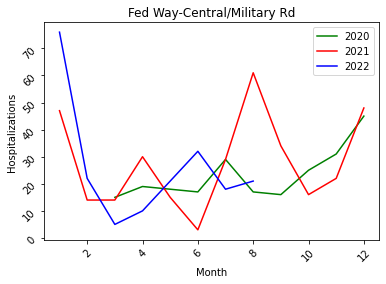

In [45]:
#testing matplot with hand-calculated arrays
#Fed Way-Central values, each plot a year, broken down into monthly hospitalization counts
fig, ax = plt.subplots()

#Fed Way-Central 2020
y = np.array([3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
x = np.array([15, 19, 18, 17, 29, 17, 16, 25, 31, 45])

#Fed Way-Central 2021
y2 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
x2 = np.array([47, 14, 14, 30, 15, 3, 29, 61, 34, 16, 22, 48])

#Fed Way-Central 2022
y3 = np.array([1, 2, 3, 4, 5, 6, 7, 8])
x3 = np.array([76, 22, 5, 10, 21, 32, 18, 21])

#2020
ax.plot(y,x, 'g', label="2020")

#2021
#ax.plot(y2, x2, 'r', label="2021")
ax.plot(y2, x2, ls='solid', color='red', label="2021")
plt.tick_params(rotation=45)
#2022
ax.plot(y3, x3, 'b', label="2022")

plt.title("Fed Way-Central/Military Rd")
plt.xlabel("Month")
plt.ylabel("Hospitalizations")
ax.legend()
plt.show

In [46]:
#Auburn-North
#df3=df2[df2['HRA'].str.contains('Auburn-North')].agg({'Hospitalizations':sum})
df3=df2[df2['HRA'].str.contains('Auburn-North')]
df3
#creating arrays from dataframes
test_array = df3.to_numpy()
#print('\nNumpy Array\n-----------\n', test_array)
#print('\nNumpy Array Datatype :', test_array.dtype)
test_array

array([['Auburn-North', Timestamp('2020-03-02 00:00:00'), 5, 2020,
        'March'],
       ['Auburn-North', Timestamp('2020-03-17 00:00:00'), 13, 2020,
        'March'],
       ['Auburn-North', Timestamp('2020-04-01 00:00:00'), 17, 2020,
        'April'],
       ['Auburn-North', Timestamp('2020-04-16 00:00:00'), 10, 2020,
        'April'],
       ['Auburn-North', Timestamp('2020-05-01 00:00:00'), 7, 2020, 'May'],
       ['Auburn-North', Timestamp('2020-05-16 00:00:00'), 5, 2020, 'May'],
       ['Auburn-North', Timestamp('2020-05-31 00:00:00'), 2, 2020, 'May'],
       ['Auburn-North', Timestamp('2020-06-15 00:00:00'), 5, 2020,
        'June'],
       ['Auburn-North', Timestamp('2020-06-30 00:00:00'), 3, 2020,
        'June'],
       ['Auburn-North', Timestamp('2020-07-15 00:00:00'), 8, 2020,
        'July'],
       ['Auburn-North', Timestamp('2020-07-30 00:00:00'), 7, 2020,
        'July'],
       ['Auburn-North', Timestamp('2020-08-14 00:00:00'), 6, 2020,
        'August'],
       ['A

<function matplotlib.pyplot.show(close=None, block=None)>

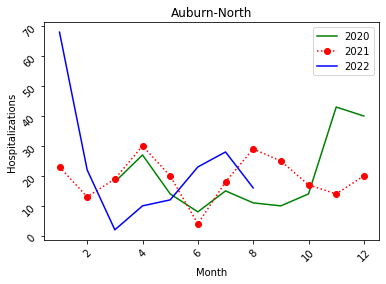

In [47]:
#auburn-north values, each plot a year, broken down into monthly hospitalization counts
fig, ax = plt.subplots()

#auburn-north 2020
y = np.array([3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
x = np.array([18, 27, 14, 8, 15, 11, 10, 14, 43, 40])

#auburn-north 2021
y2 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
x2 = np.array([23, 13, 19, 30, 20, 4, 18, 29, 25, 17, 14, 20])

#auburn-north 2022
y3 = np.array([1, 2, 3, 4, 5, 6, 7, 8])
x3 = np.array([68, 22, 2, 10, 12, 23, 28, 16])

#2020
ax.plot(y,x, 'g', label="2020")

#2021
#ax.plot(y2, x2, 'r', label="2021")
plt.plot(y2, x2, 'o', ls='dotted', color='red', label="2021")
plt.tick_params(rotation=45)
#2022
ax.plot(y3, x3, 'b', label="2022")

plt.title("Auburn-North")
plt.xlabel("Month")
plt.ylabel("Hospitalizations")
ax.legend()
plt.show


In [48]:
#Kent-SE
df4=df2[df2['HRA'].str.contains('Kent-SE')]
df4
Kent_array = df4.to_numpy()
Kent_array
print('\nNumpy Array\n-----------\n', Kent_array)
print('\nNumpy Array Datatype :', Kent_array.dtype)


Numpy Array
-----------
 [['Kent-SE' Timestamp('2020-03-02 00:00:00') 3 2020 'March']
 ['Kent-SE' Timestamp('2020-03-17 00:00:00') 21 2020 'March']
 ['Kent-SE' Timestamp('2020-04-01 00:00:00') 18 2020 'April']
 ['Kent-SE' Timestamp('2020-04-16 00:00:00') 6 2020 'April']
 ['Kent-SE' Timestamp('2020-05-01 00:00:00') 10 2020 'May']
 ['Kent-SE' Timestamp('2020-05-16 00:00:00') 8 2020 'May']
 ['Kent-SE' Timestamp('2020-05-31 00:00:00') 2 2020 'May']
 ['Kent-SE' Timestamp('2020-06-15 00:00:00') 3 2020 'June']
 ['Kent-SE' Timestamp('2020-06-30 00:00:00') 4 2020 'June']
 ['Kent-SE' Timestamp('2020-07-15 00:00:00') 7 2020 'July']
 ['Kent-SE' Timestamp('2020-07-30 00:00:00') 4 2020 'July']
 ['Kent-SE' Timestamp('2020-08-14 00:00:00') 8 2020 'August']
 ['Kent-SE' Timestamp('2020-08-29 00:00:00') 3 2020 'August']
 ['Kent-SE' Timestamp('2020-09-13 00:00:00') 4 2020 'September']
 ['Kent-SE' Timestamp('2020-09-28 00:00:00') 8 2020 'September']
 ['Kent-SE' Timestamp('2020-10-13 00:00:00') 5 2020 'Oct

<function matplotlib.pyplot.show(close=None, block=None)>

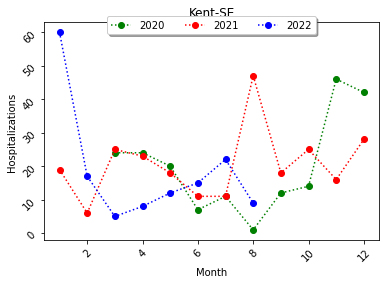

In [49]:
#Kent-SE values, each plot a year, broken down into monthly hospitalization counts
fig, ax = plt.subplots()


y = np.array([3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
x = np.array([24, 24, 20, 7, 11, 1, 12, 14, 46, 42])

y2 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
x2 = np.array([19, 6, 25, 23, 18, 11, 11, 47, 18, 25, 16, 28])

y3 = np.array([1, 2, 3, 4, 5, 6, 7, 8])
x3 = np.array([60, 17, 5, 8, 12, 15, 22, 9])

#2020
ax.plot(y,x,'o', ls='dotted', color='g', label="2020")

#2021
#ax.plot(y2, x2, 'r', label="2021")
plt.plot(y2, x2, 'o', ls='dotted', color='red', label="2021")
plt.tick_params(rotation=45)
#2022
ax.plot(y3, x3,'o', ls='dotted', color='b', label="2022")

plt.title("Kent-SE")
plt.xlabel("Month")
plt.ylabel("Hospitalizations")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show


### Year By Year Comparison

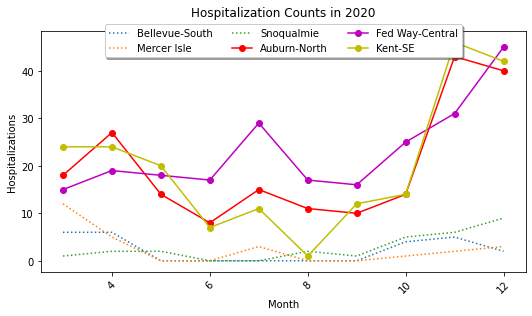

In [53]:
#2020 Highest vs Lowest
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [7.50, 4.50]
plt.rcParams["figure.autolayout"] = True

#df2_subset = df2[df2['HRA'] == "Auburn-North"]
#df2_subset = df2[df2['HRA'] == "Kent-SE"]
#df2_subset = df2[(df2['HRA'] == "Kent-SE"] & (df2["year"] == "2022")
#ax.bar(df2_subset["month"].values, df2_subset["Hospitalizations"].values)

#Bellevue-South 2020
y1 = np.array([3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
x1 = np.array([6, 6, 0, 0, 0, 0, 0, 4, 5, 2])

ax.plot(y1, x1, ls='dotted', label="Bellevue-South")

#Mercer 2020
y2 = np.array([3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
x2 = np.array([12, 5, 0, 0, 3, 0, 0, 1, 2, 3])

ax.plot(y2, x2, ls='dotted', label="Mercer Isle")

#Snoqualmie 2020
y3 = np.array([3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
x3 = np.array([1, 2, 2, 0, 0, 2, 1, 5, 6, 9])

ax.plot(y3, x3, ls='dotted', label="Snoqualmie")

#auburn-north 2020
y4 = np.array([3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
x4 = np.array([18, 27, 14, 8, 15, 11, 10, 14, 43, 40])

#Fed Way-Central 2020
y5 = np.array([3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
x5 = np.array([15, 19, 18, 17, 29, 17, 16, 25, 31, 45])

#Kent-SE
y6 = np.array([3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
x6 = np.array([24, 24, 20, 7, 11, 1, 12, 14, 46, 42])

ax.plot(y4, x4,'o', ls='solid', color='r', label="Auburn-North")
ax.plot(y5, x5,'o', ls='solid', color='m', label="Fed Way-Central")
ax.plot(y6, x6,'o', ls='solid', color='y', label="Kent-SE")

plt.rcParams['axes.titley'] = 1.0    # y is in axes-relative coordinates.
plt.rcParams['axes.titlepad'] = 15  # pad is in points...
ax.tick_params(axis="x", rotation=45)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
plt.title("Hospitalization Counts in 2020")
plt.xlabel("Month")
plt.ylabel("Hospitalizations")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()

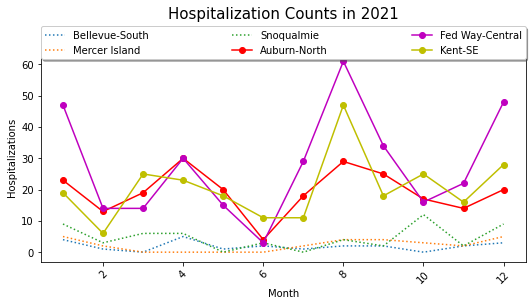

In [54]:
#2021 Highest vs Lowest
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [7.50, 4.50]
plt.rcParams["figure.autolayout"] = True

#df2_subset = df2[df2['HRA'] == "Auburn-North"]
#df2_subset = df2[df2['HRA'] == "Kent-SE"]
#df2_subset = df2[(df2['HRA'] == "Kent-SE"] & (df2["year"] == "2022")
#ax.bar(df2_subset["month"].values, df2_subset["Hospitalizations"].values)


#Bellevue-South 2021
y1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
x1 = np.array([4, 1, 0, 5, 1, 2, 1, 2, 2, 0, 2, 3])
ax.plot(y1, x1, ls='dotted', label="Bellevue-South")

#Mercer 2021
y2 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
x2 = np.array([5, 2, 0, 0, 0, 0, 2, 4, 4, 3, 2, 5])
ax.plot(y2, x2, ls='dotted', label ="Mercer Island")

#Snoqualmie 2021
y3 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
x3 = np.array([9, 3, 6, 6, 0, 3, 0, 4, 2, 12, 2, 9])

ax.plot(y3, x3, ls='dotted', label="Snoqualmie")
#auburn-north 2021
y4 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
x4 = np.array([23, 13, 19, 30, 20, 4, 18, 29, 25, 17, 14, 20])
#Fed Way-Central 2021
y5 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
x5 = np.array([47, 14, 14, 30, 15, 3, 29, 61, 34, 16, 22, 48])
#Kent-SE
y6 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
x6 = np.array([19, 6, 25, 23, 18, 11, 11, 47, 18, 25, 16, 28])

ax.plot(y4, x4,'o', ls='solid', color='r', label="Auburn-North")
ax.plot(y5, x5,'o', ls='solid', color='m', label="Fed Way-Central")
ax.plot(y6, x6,'o', ls='solid', color='y', label="Kent-SE")

plt.rcParams['axes.titley'] = 1.0    # y is in axes-relative coordinates.
plt.rcParams['axes.titlepad'] = -30  # pad is in points...
ax.tick_params(axis="x", rotation=45)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
plt.title("Hospitalization Counts in 2021", fontsize="15", x=0.5, y=1.3)
plt.xlabel("Month")
plt.ylabel("Hospitalizations")
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#          ncol=3, fancybox=True, shadow=True)
plt.legend(loc='upper center', bbox_to_anchor=(0., 1.02, 1., .102),
          ncol=3, fancybox=True, shadow=True, mode="expand", borderaxespad=0)

#bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#                      ncol=2, mode="expand", borderaxespad=0.
plt.show()

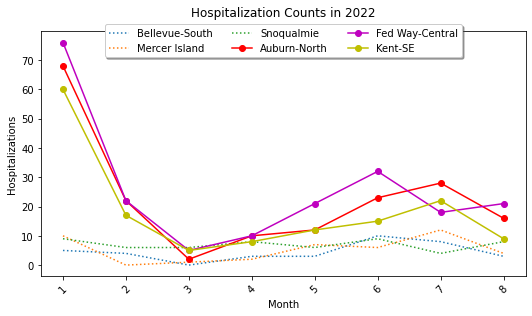

In [57]:
#2022 Highest vs Lowest
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [7.50, 4.50]
plt.rcParams["figure.autolayout"] = True

#df2_subset = df2[df2['HRA'] == "Auburn-North"]
#df2_subset = df2[df2['HRA'] == "Kent-SE"]
#df2_subset = df2[(df2['HRA'] == "Kent-SE"] & (df2["year"] == "2022")
#ax.bar(df2_subset["month"].values, df2_subset["Hospitalizations"].values)

#Bellevue-South 2022
y1 = np.array([1, 2, 3, 4, 5, 6, 7, 8])
x1 = np.array([5, 4, 0, 3, 3, 10, 8, 3])
ax.plot(y1, x1, ls='dotted', label="Bellevue-South")
#Mercer 2022
y2 = np.array([1, 2, 3, 4, 5, 6, 7, 8])
x2 = np.array([10, 0, 1, 2, 7, 6, 12, 4])
ax.plot(y2, x2, ls='dotted', label ="Mercer Island")
#Snoqualmie 2022
y3 = np.array([1, 2, 3, 4, 5, 6, 7, 8])
x3 = np.array([9, 6, 6, 8, 6, 9, 4, 8])
ax.plot(y3, x3, ls='dotted', label="Snoqualmie")
#Auburn-North
y4 = np.array([1, 2, 3, 4, 5, 6, 7, 8])
x4 = np.array([68, 22, 2, 10, 12, 23, 28, 16])
#Fed Way
y5 = np.array([1, 2, 3, 4, 5, 6, 7, 8])
x5 = np.array([76, 22, 5, 10, 21, 32, 18, 21])
#Kent-SE
y6 = np.array([1, 2, 3, 4, 5, 6, 7, 8])
x6 = np.array([60, 17, 5, 8, 12, 15, 22, 9])

ax.plot(y4, x4,'o', ls='solid', color='r', label="Auburn-North")
ax.plot(y5, x5,'o', ls='solid', color='m', label="Fed Way-Central")
ax.plot(y6, x6,'o', ls='solid', color='y', label="Kent-SE")

plt.rcParams['axes.titley'] = 1.0    # y is in axes-relative coordinates.
plt.rcParams['axes.titlepad'] = 15  # pad is in points...

ax.tick_params(axis="x", rotation=45)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
plt.title("Hospitalization Counts in 2022")
plt.xlabel("Month")
plt.ylabel("Hospitalizations")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [58]:
#Making a Scatter Plot for population
dfpop = pd.read_csv("COVID19_HRA.csv")
dfpop
dfpop.describe()

,pop,case_count,hosp_count,death_count,total_hosp_incidental,pcr_test_count,pcr_test_pos_count,pcr_test_pos_percent
count,47.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,47364.244000,10746.854167,289.437500,66.270833,99.229167,132657.895833,9984.520833,8.126433
std,15350.605483,4711.527809,202.331296,41.175152,66.198039,68283.083662,4404.007508,2.727706
min,10850.470000,955.000000,16.000000,5.000000,7.000000,19646.000000,646.000000,3.288201
25%,37377.337000,7645.750000,156.000000,35.000000,58.000000,83916.000000,6790.250000,6.276824
50%,47898.265000,10371.000000,227.500000,52.500000,87.000000,114065.500000,9601.000000,7.343931
75%,58054.502500,13003.750000,372.750000,90.250000,115.500000,165254.750000,12279.250000,10.086655
max,78898.798000,31874.000000,1101.000000,179.000000,382.000000,347864.000000,29212.000000,13.835763


In [59]:
dfpop["pop"].values

array([44869.984, 28373.314, 63248.329, 43457.181, 71721.871, 40312.567,
       38775.334, 34636.532, 36790.143, 50414.504, 40754.868, 52174.466,
       59147.182, 55924.241, 62232.449, 33793.502, 39011.971, 78898.798,
       38564.252, 26051.12 , 63665.023, 65645.508, 38704.671, 38353.931,
       38176.58 , 61547.548, 30209.322, 53475.404, 37964.531, 32377.076,
       77617.253, 30882.871, 20191.567, 51121.171, 48761.424,       nan,
       73652.347, 68774.948, 34564.773, 33369.72 , 56567.965, 53406.811,
       47898.265, 50571.072, 56961.823, 49195.726, 10850.47 , 62459.06 ])

In [60]:
dfpop["hosp_count"].values

array([ 628,  479,  158,  324,  222,  226,  150,   88,  132,  398,  204,
        482,  108,  250,  396,  248,  365,  480,  339,  107,  801,  105,
        165,  175,  331,  623,  304,  262,  168,  104,  122,  141,  161,
        277,  272, 1101,  180,  229,  190,  208,  437,  107,  408,  525,
        360,  142,   16,  195], dtype=int64)

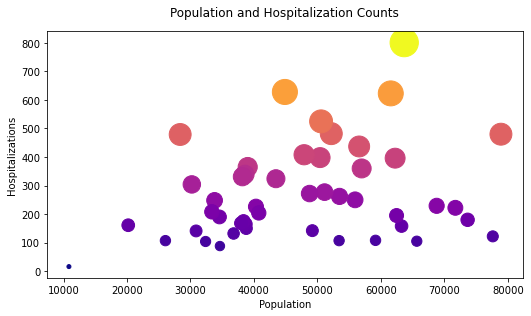

In [61]:
#Hospitalizations for Population scatter plot
fig, ax = plt.subplots()
x = dfpop["pop"].values
y = dfpop["hosp_count"].values
#ax.scatter(dfpop["pop"].values, dfpop["hosp_count"].values, s=(y))
ax.scatter(x, y, c=dfpop['hosp_count'], cmap="plasma", s=(y))
plt.title("Population and Hospitalization Counts")
plt.xlabel("Population")
plt.ylabel("Hospitalizations")
#ax.legend()
plt.show()